<a href="https://colab.research.google.com/github/Abhishekshah10/Mini-Project/blob/main/Image_Classification_(Mini_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.66 s


In [ ]:
# Gathering data (Step 1)

time: 1.02 ms


In [ ]:
# make a directory using mkdir named images
!mkdir images


mkdir: cannot create directory ‘images’: File exists
time: 119 ms


In [ ]:
# Preprocessing (Step 2)


time: 1.03 ms


In [ ]:

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 1.98 ms


In [ ]:
# To convert Matrix into vector - we use flatten()

time: 636 µs


In [ ]:
target = []
images = []
flat_data = []

DataDir = '/content/images'
Categories = ['Lion','Owls','Camel']

for category in Categories:
  class_num = Categories.index(category) # Label encoding
  path = os.path.join(DataDir,category)  # creating path
  print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    print(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)
 


/content/images/Lion
[[[ 99  67  46]
  [ 99  67  46]
  [ 98  66  45]
  ...
  [187 164 133]
  [189 166 135]
  [187 166 135]]

 [[ 99  67  46]
  [ 99  67  46]
  [ 99  67  46]
  ...
  [184 161 130]
  [187 164 133]
  [185 164 133]]

 [[100  68  47]
  [100  68  47]
  [ 99  67  46]
  ...
  [180 157 126]
  [182 159 128]
  [180 159 128]]

 ...

 [[210 135  68]
  [206 131  64]
  [204 129  64]
  ...
  [174 106  45]
  [185 117  56]
  [196 128  67]]

 [[211 136  69]
  [206 131  64]
  [203 128  63]
  ...
  [181 110  48]
  [193 122  58]
  [211 142  77]]

 [[213 138  70]
  [206 131  64]
  [202 127  60]
  ...
  [209 135  72]
  [205 131  66]
  [209 136  68]]]
[[[212 222 172]
  [212 222 172]
  [212 222 172]
  ...
  [119 139  86]
  [114 134  81]
  [115 132  80]]

 [[211 221 171]
  [211 221 171]
  [211 221 169]
  ...
  [120 140  87]
  [116 136  83]
  [117 135  83]]

 [[207 217 167]
  [207 217 165]
  [208 218 166]
  ...
  [122 142  89]
  [119 139  86]
  [120 138  86]]

 ...

 [[115 149 177]
  [ 83 114 142]

In [ ]:
flat_data[0]

array([0.38460392, 0.25911373, 0.17676078, ..., 0.80894902, 0.52284706,
       0.26195033])

time: 3.45 ms


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

time: 4.14 ms


In [ ]:
unique,count = np.unique(target,return_counts=True)
unique,count

(array([0, 1, 2]), array([20, 20, 20]))

time: 4.26 ms


In [ ]:
# Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=10)

time: 34.6 ms


In [ ]:
# Step 3
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_classifier = SVC()

parameters = {'C':[0.1,1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf','linear','poly']}

grid_search = GridSearchCV(estimator=svm_classifier,param_grid= parameters,scoring='accuracy',cv=10)
grid_search = grid_search.fit(x_train,y_train)

time: 3min 9s


In [ ]:
grid_search.best_score_

0.43

time: 2.63 ms


In [ ]:
grid_search.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

time: 3.89 ms


In [ ]:
grid_search.best_estimator_

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 3.68 ms


In [ ]:
svm_classifier = SVC(C=0.1,gamma=1,kernel='poly')
svm_classifier.fit(x_train,y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

time: 284 ms


In [ ]:
y_pred = svm_classifier.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 0])

time: 103 ms


In [ ]:
y_test

array([1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2])

time: 6.21 ms


In [ ]:
# Step 4
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

time: 1.09 ms


In [ ]:
accuracy_score(y_pred,y_test)

0.6111111111111112

time: 3.81 ms


In [ ]:
confusion_matrix(y_pred,y_test)

array([[4, 1, 2],
       [0, 6, 0],
       [1, 3, 1]])

time: 6.26 ms


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.60      1.00      0.75         6
           2       0.33      0.20      0.25         5

    accuracy                           0.61        18
   macro avg       0.58      0.59      0.56        18
weighted avg       0.60      0.61      0.58        18

time: 10.2 ms


In [ ]:
# Saving the Model
import pickle
pickle.dump(svm_classifier,open('img_model.p','wb'))

time: 96.2 ms


In [ ]:

modeling = pickle.load(open('img_model.p','rb'))

time: 30.6 ms


Enter your URL: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuRYlquzDevh6VbMqXdU_egGcjkhZVnlWSGQ&usqp=CAU.jpg
(225, 225, 3)
 Predicted Output: Lion


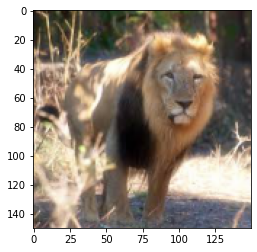

time: 6.77 s


In [ ]:
# Step 5 - Testing a New Image
flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = modeling.predict(flat_data)
y_out = Categories[y_out[0]]
print(f' Predicted Output: {y_out}')